In [1]:
%load_ext autoreload
%autoreload 2
import tensorflow as tf
from data.registry import mpg
from tensorflow.estimator import DNNRegressor
from models.utils import get_train_inputs,predict_estimator
from utils import create_session_config
from flags import FLAGS
from matplotlib import pyplot as plt
import matplotlib 
%matplotlib inline
import numpy as np
from experiment.experiment_vis import ExperimentVis
import os
from bokeh.io import export_png
from asynch import invoke_in_process_pool,Callable
import pandas as pd
import seaborn as sns

/usr/local/lib/python3.5/dist-packages/nbconvert/exporters/exporter_locator.py:28: DeprecationWarning: `nbconvert.exporters.exporter_locator` is deprecated in favor of `nbconvert.exporters.base` since nbconvert 5.0.
  DeprecationWarning)
/home/pawel/tensorflow/lib/python3.5/site-packages/tornado/web.py:1747: DeprecationWarning: @asynchronous is deprecated, use coroutines instead
  DeprecationWarning)


In [2]:
# FLAGS.data_set = 'uci_parkinsons_joint'
FLAGS.data_set = 'uci_whitewine_joint'
# FLAGS.data_set = 'uci_redwine'
# FLAGS.data_set = 'fx_eurgbp_predicted'
FLAGS.dir = '/home/pawel/PycharmProjects/RM_labs/old_tmp2/%s/'%FLAGS.data_set

In [3]:
FLAGS.model = 'rnade_laplace'
FLAGS.plot=True
os.chdir(FLAGS.dir)
FLAGS.per_process_gpu_memory_fraction=0.1
exp = ExperimentVis()
ds_y=exp.data_loader.test_y
exp.best_model_params
rnade_laplace_lls = invoke_in_process_pool(1, Callable(predict_estimator, exp.best_model,exp.data_loader.test_x , ds_y))[0]

INFO:tensorflow:Using config: {'_log_step_count_steps': 1000, '_keep_checkpoint_every_n_hours': 10000, '_train_distribute': None, '_save_summary_steps': 500, '_task_type': 'worker', '_global_id_in_cluster': 0, '_model_dir': 'tensorboard/rnade_laplace/id_23_hidden_units_20_k_mix_35_batch_size_200_learning_rate_0.00019158545419928878_ts_2018-09-28_083005', '_protocol': None, '_save_checkpoints_steps': 1000, '_eval_distribute': None, '_session_config': gpu_options {
  per_process_gpu_memory_fraction: 0.1
}
, '_keep_checkpoint_max': 3, '_device_fn': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7f2afdd6f080>, '_service': None, '_evaluation_master': '', '_tf_random_seed': None, '_save_checkpoints_secs': None, '_is_chief': True, '_num_worker_replicas': 1, '_master': '', '_num_ps_replicas': 0, '_task_id': 0}
loaded data: uci_whitewine_joint.npz
loaded data: uci_whitewine_joint.npz


{'batch_size': 200,
 'components_distribution': 'laplace',
 'hidden_units': 20,
 'k_mix': 35,
 'learning_rate': 0.00019158545419928878,
 'tensorboard_folder': 'tensorboard',
 'tf_random_seed': 953996010,
 'x_size': 0,
 'y_size': 12}

FloatProgress(value=0.0, max=1.0)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tensorboard/rnade_laplace/id_23_hidden_units_20_k_mix_35_batch_size_200_learning_rate_0.00019158545419928878_ts_2018-09-28_083005/model.ckpt-9701
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


In [4]:
cat_columns = []

for i in range(exp.data_loader.data.shape[1]):
    uniqness = len(np.unique(exp.data_loader.data[:,i]))/len(exp.data_loader.data[:,i])
    print(uniqness)    

0.013883217639853002
0.02552062066149449
0.017762351980400163
0.06329113924050633
0.032666394446712946
0.02694977541853818
0.051245406288280934
0.18170681910984074
0.021028991425071458
0.016129032258064516
0.021028991425071458
0.0014291547570436914


In [5]:
FLAGS.model = 'nn_pdf_ar'
FLAGS.plot=True
os.chdir(FLAGS.dir)
FLAGS.per_process_gpu_memory_fraction=0.1
exp = ExperimentVis()
# exp.best_model_params
nn_pdf_ar_lls = invoke_in_process_pool(1, Callable(predict_estimator, exp.best_model, exp.data_loader.test_x, ds_y))[0]

INFO:tensorflow:Using config: {'_log_step_count_steps': 1000, '_keep_checkpoint_every_n_hours': 10000, '_train_distribute': None, '_save_summary_steps': 500, '_task_type': 'worker', '_global_id_in_cluster': 0, '_model_dir': 'tensorboard/nn_pdf_ar/id_43_arch1__arch2_10_10_10_batch_size_200_learning_rate_0.0001_ts_2018-09-29_033943', '_protocol': None, '_save_checkpoints_steps': 1000, '_eval_distribute': None, '_session_config': gpu_options {
  per_process_gpu_memory_fraction: 0.1
}
, '_keep_checkpoint_max': 3, '_device_fn': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7f2afdcbb0b8>, '_service': None, '_evaluation_master': '', '_tf_random_seed': None, '_save_checkpoints_secs': None, '_is_chief': True, '_num_worker_replicas': 1, '_master': '', '_num_ps_replicas': 0, '_task_id': 0}
loaded data: uci_whitewine_joint.npz
loaded data: uci_whitewine_joint.npz


FloatProgress(value=0.0, max=1.0)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tensorboard/nn_pdf_ar/id_43_arch1__arch2_10_10_10_batch_size_200_learning_rate_0.0001_ts_2018-09-29_033943/model.ckpt-132601
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


Text(0.5, 1.0, 'log_likelihood_0')

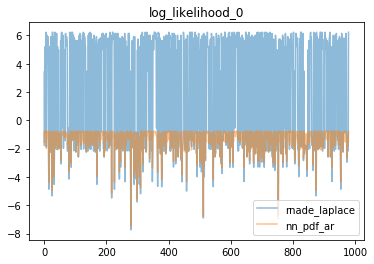

Text(0.5, 1.0, 'log_likelihood_1')

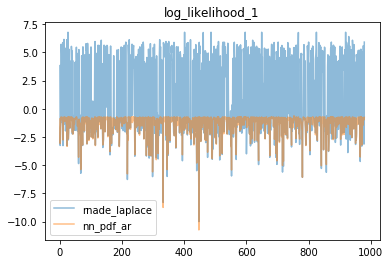

Text(0.5, 1.0, 'log_likelihood_2')

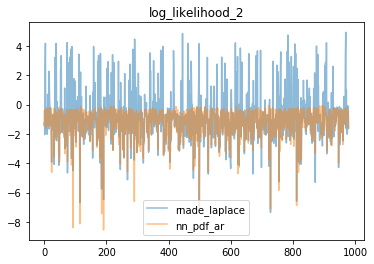

Text(0.5, 1.0, 'log_likelihood_3')

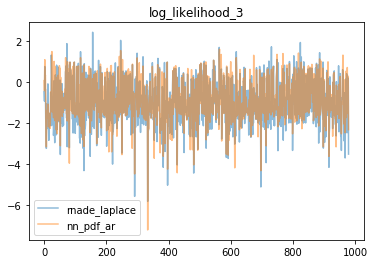

Text(0.5, 1.0, 'log_likelihood_4')

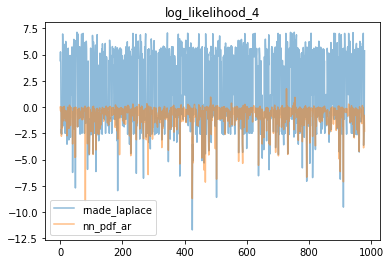

Text(0.5, 1.0, 'log_likelihood_5')

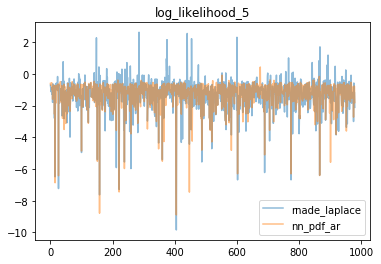

Text(0.5, 1.0, 'log_likelihood_6')

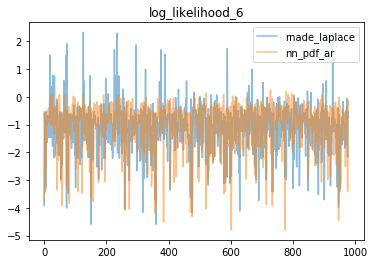

Text(0.5, 1.0, 'log_likelihood_7')

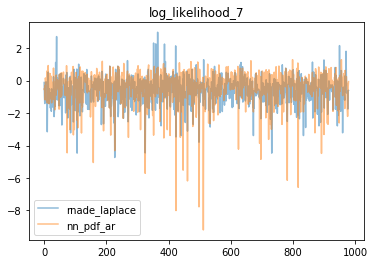

Text(0.5, 1.0, 'log_likelihood_8')

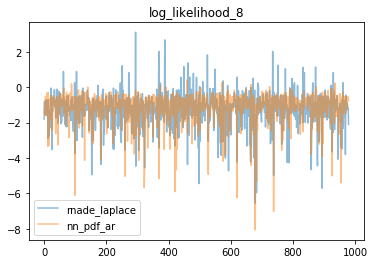

Text(0.5, 1.0, 'log_likelihood_9')

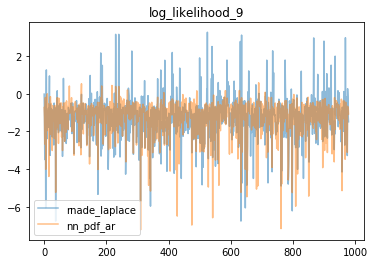

Text(0.5, 1.0, 'log_likelihood_10')

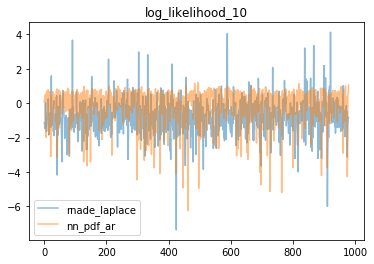

Text(0.5, 1.0, 'log_likelihood_11')

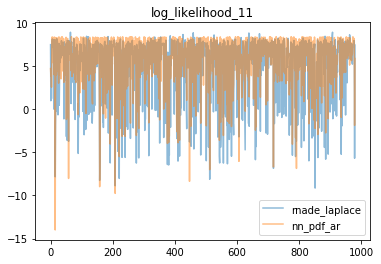

In [6]:
for i in range(ds_y.shape[1]):
    plt.plot(rnade_laplace_lls['log_likelihood_%d'%i], label="rnade_laplace",alpha=0.5)
    plt.plot(nn_pdf_ar_lls['log_likelihood_%d'%i], label="nn_pdf_ar",alpha=0.5)
    plt.title('log_likelihood_%d'%i)
    plt.legend()
    plt.show()

In [14]:
# idx_max=np.argmax(rnade_laplace_lls["log_likelihood_0"])

# other_ds=exp.data_loader.validation_y
# np.sum((other_ds[:,0]- ds_y[2,0])==0)/len(other_ds)

len(np.unique(ds_y[:,0]))/len(ds_y[:,0])
len(np.unique(exp.data_loader.data[:,0]))
len(exp.data_loader.data)

# np.sum(exp.data_loader.data[5,0] == exp.data_loader.data[:,0])/len(exp.data_loader.data)

0.01957446808510638

23

5875

-1.0408063010248394

-1.1044111889601789

/home/pawel/tensorflow/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6499: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


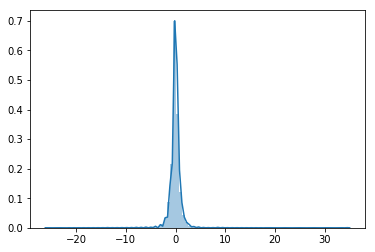

In [10]:
ll_name="log_likelihood_0"
np.sum(rnade_laplace_lls[ll_name])/len(rnade_laplace_lls[ll_name])
np.sum(nn_pdf_ar_lls[ll_name])/len(nn_pdf_ar_lls[ll_name])
sns.distplot(ds_y[:,0],bins=100)

In [7]:
FLAGS.model = 'rnade_laplace'
FLAGS.plot=True
os.chdir(FLAGS.dir)
FLAGS.per_process_gpu_memory_fraction=0.1
exp = ExperimentVis()
y0=np.linspace(-10,10,1000).reshape(-1,1)
y=np.c_[y0,np.zeros((len(y0), ds_y.shape[1]-1))]
rnade_laplace_pred = invoke_in_process_pool(1, Callable(predict_estimator, exp.best_model, np.zeros((len(y0), exp.data_loader.test_x.shape[1]),dtype=np.float32), y))[0]

INFO:tensorflow:Using config: {'_log_step_count_steps': 1000, '_keep_checkpoint_every_n_hours': 10000, '_train_distribute': None, '_save_summary_steps': 500, '_task_type': 'worker', '_global_id_in_cluster': 0, '_model_dir': 'tensorboard/rnade_laplace/id_23_hidden_units_20_k_mix_35_batch_size_200_learning_rate_0.00019158545419928878_ts_2018-09-28_083005', '_protocol': None, '_save_checkpoints_steps': 1000, '_eval_distribute': None, '_session_config': gpu_options {
  per_process_gpu_memory_fraction: 0.1
}
, '_keep_checkpoint_max': 3, '_device_fn': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7f2bc4704eb8>, '_service': None, '_evaluation_master': '', '_tf_random_seed': None, '_save_checkpoints_secs': None, '_is_chief': True, '_num_worker_replicas': 1, '_master': '', '_num_ps_replicas': 0, '_task_id': 0}
loaded data: uci_whitewine_joint.npz
loaded data: uci_whitewine_joint.npz


FloatProgress(value=0.0, max=1.0)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tensorboard/rnade_laplace/id_23_hidden_units_20_k_mix_35_batch_size_200_learning_rate_0.00019158545419928878_ts_2018-09-28_083005/model.ckpt-9701
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


In [8]:
FLAGS.model = 'nn_pdf_ar'
FLAGS.plot=True
os.chdir(FLAGS.dir)
FLAGS.per_process_gpu_memory_fraction=0.1
exp = ExperimentVis()
pd.DataFrame(exp.data_loader.train_y).describe()
nn_pdf_ar_pred = invoke_in_process_pool(1, Callable(predict_estimator, exp.best_model, np.zeros((len(y0), exp.data_loader.test_x.shape[1]),dtype=np.float32), y))[0]

INFO:tensorflow:Using config: {'_log_step_count_steps': 1000, '_keep_checkpoint_every_n_hours': 10000, '_train_distribute': None, '_save_summary_steps': 500, '_task_type': 'worker', '_global_id_in_cluster': 0, '_model_dir': 'tensorboard/nn_pdf_ar/id_43_arch1__arch2_10_10_10_batch_size_200_learning_rate_0.0001_ts_2018-09-29_033943', '_protocol': None, '_save_checkpoints_steps': 1000, '_eval_distribute': None, '_session_config': gpu_options {
  per_process_gpu_memory_fraction: 0.1
}
, '_keep_checkpoint_max': 3, '_device_fn': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7f2afdd27da0>, '_service': None, '_evaluation_master': '', '_tf_random_seed': None, '_save_checkpoints_secs': None, '_is_chief': True, '_num_worker_replicas': 1, '_master': '', '_num_ps_replicas': 0, '_task_id': 0}
loaded data: uci_whitewine_joint.npz
loaded data: uci_whitewine_joint.npz


,0,1,2,3,4,5,6,7,8,9,10,11
count,3134.000000,3134.000000,3.134000e+03,3.134000e+03,3134.000000,3.134000e+03,3.134000e+03,3134.000000,3134.000000,3.134000e+03,3134.000000,3.134000e+03
mean,0.000004,0.000002,9.768011e-07,-2.416137e-07,-0.000003,-2.982134e-08,-3.347293e-08,-0.000398,-0.000020,-5.282637e-07,-0.000003,2.476997e-07
std,1.000163,1.000164,1.000163e+00,1.000159e+00,1.000158,1.000160e+00,1.000159e+00,1.000160,1.000159,1.000160e+00,1.000160,1.000161e+00
min,-3.576628,-1.997607,-2.759666e+00,-1.151959e+00,-1.555642,-1.918789e+00,-2.999218e+00,-2.280297,-3.123759,-2.358335e+00,-1.725913,-3.275421e+00
25%,-0.659125,-0.680491,-5.361767e-01,-9.160885e-01,-0.444351,-6.785482e-01,-6.993584e-01,-0.760555,-0.719290,-6.958782e-01,-0.831547,-1.008879e+00
50%,-0.075624,-0.173907,-1.244197e-01,-2.084758e-01,-0.120224,-8.795736e-02,-9.535495e-02,-0.084382,-0.051381,-1.708919e-01,-0.099793,1.243925e-01
75%,0.507876,0.433993,3.696890e-01,6.760400e-01,0.203903,6.207517e-01,6.712648e-01,0.670578,0.616527,5.290900e-01,0.713268,1.243925e-01
max,8.560184,7.374184,1.091067e+01,1.166369e+01,11.826155,1.497211e+01,6.990070e+00,14.745507,4.089649,5.166469e+00,2.989837,3.524206e+00


FloatProgress(value=0.0, max=1.0)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tensorboard/nn_pdf_ar/id_43_arch1__arch2_10_10_10_batch_size_200_learning_rate_0.0001_ts_2018-09-29_033943/model.ckpt-132601
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


<Figure size 432x288 with 0 Axes>

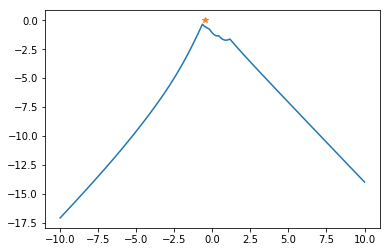

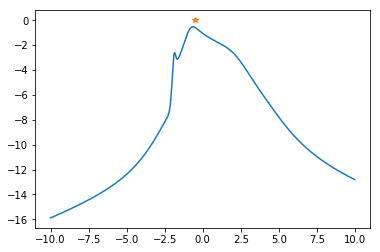

In [10]:
plt.plot(y0,rnade_laplace_pred['log_likelihood_0'])
plt.plot(ds_y[1,0], [0],'*')
plt.figure()
plt.plot(y0,nn_pdf_ar_pred['log_likelihood_0'])
plt.plot(ds_y[1,0], [0],'*')

In [11]:
# rnade_laplace_pred['log_likelihood_0'][]

(-0.1, 2.5)

Text(0, 0.5, '$f(y_1)$')

Text(0.5, 0, '$y_1$')

<Figure size 432x288 with 0 Axes>

(-0.1, 2.5)

Text(0, 0.5, '$f(y_1)$')

Text(0.5, 0, '$y_1$')

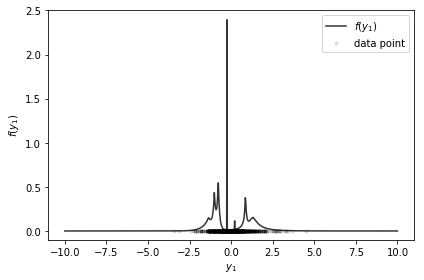

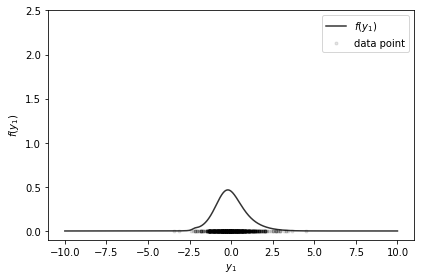

In [37]:
plt.ylim([-0.1,2.5])
plt.plot(y0,np.exp(rnade_laplace_pred['log_likelihood_0'][:]),'k', alpha=0.8, label="$f(y_1)$")
plt.plot(exp.data_loader.test_y[:,0], [0]*exp.data_loader.test_y.shape[0],'k.',alpha=0.1,label="data point")
plt.legend()
plt.ylabel('$f(y_1)$')
plt.xlabel('$y_1$')
plt.tight_layout()
plt.savefig('/home/pawel/PycharmProjects/RM/paper/figures/density_y1_ar_whitewine_rnade.png')
plt.figure()
plt.ylim([-0.1,2.5])
plt.plot(y0,np.exp(nn_pdf_ar_pred['log_likelihood_0'][:]),'k', label="$f(y_1)$",alpha=0.8)
plt.plot(exp.data_loader.test_y[:,0], [0]*exp.data_loader.test_y.shape[0],'k.',alpha=0.1,label="data point")
# plt.yscale("log")
plt.legend()
plt.ylabel('$f(y_1)$')
plt.xlabel('$y_1$')
plt.tight_layout()
plt.savefig('/home/pawel/PycharmProjects/RM/paper/figures/density_y1_ar_whitewine_monde.png')

/home/pawel/tensorflow/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6499: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


<Figure size 432x288 with 0 Axes>

/home/pawel/tensorflow/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6499: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


<Figure size 432x288 with 0 Axes>

/home/pawel/tensorflow/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6499: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


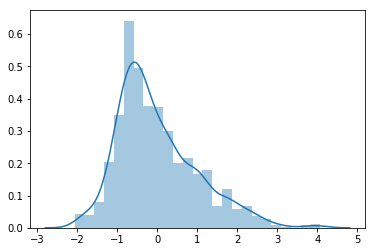

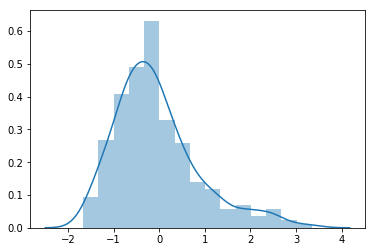

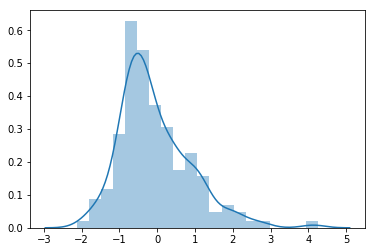

In [218]:
import seaborn as sns
sns.distplot(exp.data_loader.train_y[:,0])
plt.figure()
sns.distplot(exp.data_loader.validation_y[:,0])
plt.figure()
sns.distplot(exp.data_loader.test_y[:,0])